In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_Klout.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

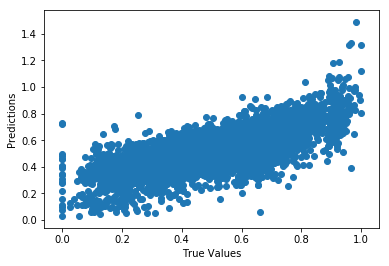

[ -2.27050480e-10   5.86270594e-05   3.96816124e-05  -1.33708960e-01
   6.64580465e-01  -9.88270717e+00  -1.06546066e+00   1.54607397e+02
  -4.24373656e-04  -4.67531883e-05  -4.76381690e-04  -4.76592609e-05
  -6.47347788e-02  -4.32481882e-02   7.44458284e-02   2.71579639e-01
   1.43658616e+01   1.03124234e+00  -2.79164609e-01  -4.59844829e-02
  -4.83456820e+01   2.92340534e+01   8.55934381e-05  -8.45499038e-06
  -2.26969209e-04  -1.73220359e-04   2.11851471e-01  -1.27928995e-01
   3.84461724e-01  -1.59679639e-02  -2.09203918e+01   2.76644320e+00
   2.76804947e-01  -2.13270574e-01   2.64145105e+02  -7.34516861e+01
  -2.01370867e-07   9.98125059e-03   4.15694864e-05   1.45891747e-03
  -1.22459672e-06   5.34101636e-05   1.96919948e-06  -1.37194698e-05]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.38016065  0.46565273  0.47815918  0.49130861  0.45430225  0.44801678
  0.46762511  0.40456634  0.33582443  0.32308037]


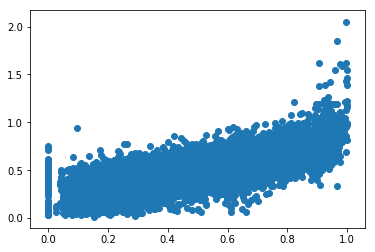

In [7]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.525890381922


In [9]:
print(lm.coef_)

[ -2.27050480e-10   5.86270594e-05   3.96816124e-05  -1.33708960e-01
   6.64580465e-01  -9.88270717e+00  -1.06546066e+00   1.54607397e+02
  -4.24373656e-04  -4.67531883e-05  -4.76381690e-04  -4.76592609e-05
  -6.47347788e-02  -4.32481882e-02   7.44458284e-02   2.71579639e-01
   1.43658616e+01   1.03124234e+00  -2.79164609e-01  -4.59844829e-02
  -4.83456820e+01   2.92340534e+01   8.55934381e-05  -8.45499038e-06
  -2.26969209e-04  -1.73220359e-04   2.11851471e-01  -1.27928995e-01
   3.84461724e-01  -1.59679639e-02  -2.09203918e+01   2.76644320e+00
   2.76804947e-01  -2.13270574e-01   2.64145105e+02  -7.34516861e+01
  -2.01370867e-07   9.98125059e-03   4.15694864e-05   1.45891747e-03
  -1.22459672e-06   5.34101636e-05   1.96919948e-06  -1.37194698e-05]
